# 集成學習 (Ensemble Learning) - 投票法 (Voting)
- 俗話說：三個臭皮匠，勝過一個諸葛亮。集成學習的基本思想就是這樣，即多個模型聯合起來，可以得到更好的效果。
- 集成學習結合數個機器學習模型的方式，可以分為以下幾種：
  - **平行集成**：將多個基礎學習模型以平行的方式進行結合，例如隨機森林 (Random Forest)，其想法是整合基礎模型獨立產生的預期結果，藉以降低整體預測的變異性（variance）。例如：Bagging。
  - **循序集成**：將多個基礎學習模型以串接的方式結合在一起（例如 AdaBoost），動機是利用基礎模型的相關性，串接在一起的下一個模型會針對上一個模型預測有誤的樣本進行學習，以降低整體預測的偏差（bias）。例如：Boosting。
  - **混合集成**：將多個不同的基礎學習模型以平行與串接的方式結合，期待能改善預測效能。例如：Stacking。

<img src="https://media.datacamp.com/legacy/image/upload/v1700592126/image1_fcace6f2b3.png" width="800">

資料來源: [What is Bagging in Machine Learning? A Guide With Examples](https://www.datacamp.com/tutorial/what-bagging-in-machine-learning-a-guide-with-examples)

<img src="https://miro.medium.com/v2/resize:fit:2000/1*T0L64nrOJSr8-LRJlWfLtQ.jpeg" width="800">

資料來源: [Ensemble Learning: Stacking, Blending & Voting](https://towardsdatascience.com/ensemble-learning-stacking-blending-voting-b37737c4f483)

## 袋裝法 (Bagging, Bootstrap Aggregating)
- 袋裝法是一種集成學習方法，透過將多個模型的預測結果進行投票或平均，以提升模型的預測能力。袋裝法的基本概念是透過隨機抽樣的方式，從訓練資料中抽取多個子樣本，再分別訓練多個模型，最後將這些模型的預測結果進行投票或平均。袋裝法的代表性演算法有隨機森林 (Random Forest)。
- 隨機森林是一種基於袋裝法的集成學習方法，透過建立多個決策樹模型，再將這些決策樹的預測結果進行投票，以提升模型的預測能力。隨機森林的基本概念是透過隨機抽樣的方式，從訓練資料中抽取多個子樣本，再分別訓練多個決策樹模型，最後將這些決策樹的預測結果進行投票。隨機森林的優點是具有較高的準確性、較低的過擬合風險，並且能夠處理高維度的特徵資料。

In [1]:
import pandas as pd

# 讀取資料
df = pd.read_csv('ex6.csv')

# 計算 Type2 是否為空值，若為空值則 hasType2 為 0，否則為 1
df['hasType2'] = [0 if x else 1 for x in df['Type2'].isna()]
'''
也可以寫成:
li_hasType2 = []
for x in df['Type2'].isna():
    if x:
        li_hasType2.append(0)
    else:
        li_hasType2.append(1)
'''

# 顯示前 5 筆資料
df.head(5)

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary,hasType2
0,1,妙蛙種子,Grass,Poison,45,49,49,65,65,45,1,False,1
1,2,妙蛙草,Grass,Poison,60,62,63,80,80,60,1,False,1
2,3,妙蛙花,Grass,Poison,80,82,83,100,100,80,1,False,1
3,3,妙蛙花Mega,Grass,Poison,80,100,123,122,120,80,1,False,1
4,4,小火龍,Fire,NaN,39,52,43,60,50,65,1,False,0


In [2]:
from sklearn.model_selection import train_test_split

# 將資料分為訓練與測試資料集
X, y = df.loc[:, 'HP':'Speed'], df['hasType2']

# 切分資料，同時設定 random_state 以便重現結果
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.25,
    random_state=0
)

# 顯示訓練資料集的形狀 (筆數, 特徵數)
X_train.shape

(670, 6)

In [3]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

# 建立模型
models = {
    'KNN': KNeighborsClassifier(n_neighbors=3), 
    'bagging': BaggingClassifier(
        KNeighborsClassifier(n_neighbors=3), 
        n_estimators=3, 
        max_samples=0.8, 
        max_features=0.8, 
        n_jobs=-1, 
        random_state=0
    )
}

# 儲存分數
scores = {}

# 比較模型的表現
for name, clf in models.items():
    # 訓練模型
    clf.fit(X_train, y_train)
    
    # 計算分數
    scores[(name, 'Train score')] = clf.score(X_train, y_train)
    scores[(name, 'Test score')] = clf.score(X_test, y_test)

# 顯示分數
pd.Series(scores).unstack()

,Test score,Train score
KNN,0.562500,0.801493
bagging,0.580357,0.722388


袋裝法最典型的例子就是隨機森林，這個方法是以決策樹為基礎學習器，藉由樣本與特徵的 boostrap 抽樣產生不同的訓練樣本集，以此建構出不同的決策樹模型。

單棵決策樹在樹的深度過大時，容易產生過擬合現象，而隨機森林集成多棵決策樹的結果，儘管單夥決策樹傾向過擬合，若抽樣有足多的隨機性，在大數法則下，許多的決策樹的結果會趨向一致，因此集成結果會更接近真實情況，提升預測準確率。

雖然隨機森林能有效避免過擬合，但並非不會發生，可能原因與處理方式如下：
- 決策樹的數量不足：難以反應大數法則，可增加決策樹的數量（n_estimators）。
- 對特徵抽樣的隨機性不夠：若特徵間的相關性過高，導致抽樣時可能會偏重某些特徵，這樣建構好的決策樹就缺代多樣性，就算集成後也容易產生過擬合。此時可以檢視各個特徵之間的相關程度，或是減少抽樣的特徵數量（max_features）。
- 樣本的類別不平衡：除了能控制樣本的抽樣數量多（max_samples），若遇到樣本所屬類別較少時，就很不容易被抽中，此時也容易發生過擬合，可設定類別權重（class_weight），來處理。

## 提升法 (Boosting)
- 提升法是一種集成學習方法，透過將多個弱模型（錯誤率略低於瞎猜）的預測結果進行加權平均，以提升模型的預測能力。提升法的基本概念是透過串接的方式，將多個模型進行結合，並且針對上一個模型預測有誤的樣本進行學習，以降低整體預測的偏差（bias）。提升法的代表性演算法有 AdaBoost、Gradient Boosting、XGBoost、LightGBM、CatBoost 等。

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# 建立模型
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=1), 
    'AdaBoost': AdaBoostClassifier(
        n_estimators=3, 
        random_state=0
    )
}

# 儲存分數
scores = {}

# 比較模型的表現
for name, clf in models.items():
    # 訓練模型
    clf.fit(X_train, y_train)
    
    # 計算分數
    scores[(name, 'Train score')] = clf.score(X_train, y_train)
    scores[(name, 'Test score')] = clf.score(X_test, y_test)
    
# 顯示分數
pd.Series(scores).unstack()

d:\anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Test score,Train score
AdaBoost,0.633929,0.607463
Decision Tree,0.616071,0.607463


### 迴歸任務

In [5]:
# 選取特徵，以及目標 (數值型態)
X_r, y_r = df.loc[:, 'Attack':'Speed'], df['HP']

# 切分資料
X_r_train, X_r_test, y_r_train, y_r_test = train_test_split(
    X_r, 
    y_r, 
    test_size=0.25, 
    random_state=0
)

# 顯示訓練資料集的形狀 (筆數, 特徵數)
X_r_train.shape

(670, 5)

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# 建立模型
reg = DecisionTreeRegressor(max_depth=3)

# 整合模型
models = {
    'Decision Tree': reg, 
    'AdaBoost': AdaBoostRegressor(
        reg, 
        learning_rate=0.01, 
        random_state=0
    )
}

# 儲存分數
scores = {}

# 比較模型的表現
for name, clf in models.items():
    # 訓練模型
    clf.fit(X_r_train, y_r_train)
    
    # 計算分數
    scores[(name, 'Train score')] = clf.score(X_r_train, y_r_train)
    scores[(name, 'Test score')] = clf.score(X_r_test, y_r_test)
    
# 顯示分數
pd.Series(scores).unstack()

,Test score,Train score
AdaBoost,0.339387,0.446392
Decision Tree,0.226408,0.413383


## 堆疊法 (Stacking)
- 一種集成學習方法，透過將多個模型的預測結果進行串接，再透過另一個模型進行整合，以提升模型的預測能力。它整點了袋裝法與提升法的優點。
- 基本概念是透過串接的方式，將多個模型進行結合，並且將這些模型的預測結果進行串接，再透過另一個模型進行整合。
- 優點是能夠整合多個模型的預測結果，進而提升模型的預測能力。堆疊法的缺點是需要額外的計算成本，並且需要調整多個模型的參數，以獲得最佳的整合效果。

### 基本結構
- 第一層：基礎模型（Base Models）
  - 多個不同的模型（例如決策樹、支持向量機、隨機森林、神經網絡等）。
  - 每個基礎模型會接收相同的輸入數據，並生成預測結果。
  - 這些模型可以是不同類型的算法，也可以是相同算法的不同超參數版本。
- 第二層：元學習器（Meta Learner）
  - 元學習器接受第一層基礎模型的預測作為輸入特徵，進一步學習如何結合這些預測來生成最終結果。
  - 常用的元學習器包括邏輯迴歸、線性回歸、梯度提升機（如 XGBoost）等。

### 步驟
- 步驟 1：訓練基礎模型
  - 使用訓練數據（Training Data）訓練多個基礎模型。
  - 每個模型獨立學習，輸出對目標變數的預測值。
- 步驟 2：生成第二層的輸入特徵
  - 將基礎模型對訓練集的預測結果（或對驗證集的預測結果，見「交叉驗證版本」）作為第二層輸入特徵。
  - 如果有 𝑛 個基礎模型，第二層輸入特徵矩陣的每列對應一個模型的預測。
- 步驟 3：訓練元學習器
  - 使用第二層的輸入特徵和真實目標值，訓練元學習器。
  - 元學習器的目標是學習如何將基礎模型的預測結果組合，得到最終的預測。
- 步驟 4：測試與預測
  - 將測試數據分別輸入基礎模型，獲得第一層的預測。
  - 將這些預測結果輸入元學習器，生成最終預測結果。


### Voting (投票法)
- VotingClassifier 是一種集成學習方法，透過將多個模型的預測結果進行投票，以提升模型的預測能力。VotingClassifier 的基本概念是透過投票的方式，將多個模型進行結合，並且將這些模型的預測結果進行投票。
- voting='hard' 代表多個模型的預測結果進行投票，得票最多的類別為最終預測結果。
- voting='soft' 代表多個模型的預測機率進行平均，再進行投票，得票最多的類別為最終預測結果。

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# 建立模型
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = GaussianNB()

# 整合模型
en_clf1 = VotingClassifier(
    estimators=[
        ('lr', clf1), 
        ('rf', clf2), 
        ('nb', clf3)
    ], 
    voting='hard'
)

# 訓練模型
en_clf1.fit(X_train, y_train)

# 顯示前 10 筆預測結果
en_clf1.predict(X_test)[:10]

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1])

In [8]:
# 記錄準確率
scores = {}
name = 'Voting (hard)'
scores[(name, 'Train score')] = en_clf1.score(X_train, y_train)
scores[(name, 'Test score')] = en_clf1.score(X_test, y_test)

# 取出每個模型的分類結果
print('真實類別：', y_test[:10].values)
print('邏輯斯迴歸分類結果：', en_clf1.named_estimators_['lr'].predict(X)[:10])
print('隨機森林分類結果：', en_clf1.named_estimators_['rf'].predict(X)[:10])
print('單純貝氏分類結果：', en_clf1.named_estimators_['nb'].predict(X)[:10])

真實類別： [1 1 0 0 1 1 1 0 0 1]
邏輯斯迴歸分類結果： [0 0 1 1 0 0 1 1 1 0]
隨機森林分類結果： [1 0 1 1 0 0 1 1 1 0]
單純貝氏分類結果： [0 0 1 1 0 0 1 1 1 0]


In [9]:
# 整合模型
en_clf2 = VotingClassifier(
    estimators=[
        ('lr', clf1), 
        ('rf', clf2), 
        ('gnb', clf3)
    ], 
    voting='soft')

# 訓練模型
en_clf2.fit(X_train, y_train)

# 顯示前 10 筆預測結果
en_clf2.predict(X_test)[:10]

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1])

In [10]:
# 記錄準確率
name = 'Voting (soft)'
scores[(name, 'Train score')] = en_clf2.score(X_train, y_train)
scores[(name, 'Test score')] = en_clf2.score(X_test, y_test)

# 取出每個模型的預測機率
prob = en_clf2.transform(X_test)
print('真實類別：', y_test.iloc[0])
print('邏輯斯迴歸分類機率：', prob[0][:2])
print('隨機森林分類機率：', prob[0][2:4])
print('單純貝氏分類機率：', prob[0][4:])

真實類別： 1
邏輯斯迴歸分類機率： [0.35731504 0.64268496]
隨機森林分類機率： [0.46433333 0.53566667]
單純貝氏分類機率： [0.43394856 0.56605144]


In [11]:
# 整合模型
en_clf3 = VotingClassifier(
    estimators=[
        ('lr', clf1), 
        ('rf', clf2), 
        ('gnb', clf3)
    ], 
    voting='soft', 
    weights=[2,1,1]
)

# 訓練模型
en_clf3.fit(X_train, y_train)

# 顯示前 10 筆預測結果
en_clf3.predict(X_test)[:10]

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1])

In [12]:
# 記錄準確率
name = 'Voting (soft + weight)'
scores[(name, 'Train score')] = en_clf3.score(X_train, y_train)
scores[(name, 'Test score')] = en_clf3.score(X_test, y_test)

# 顯示分數
pd.Series(scores).unstack()

,Test score,Train score
Voting (hard),0.589286,0.661194
Voting (soft + weight),0.589286,0.801493
Voting (soft),0.611607,0.852239


### Stacking (堆疊法)

In [13]:


from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier

# 建立模型
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(max_depth=7, random_state=0)
clf3 = GaussianNB()

# 以 LogisticRegression 為最終分類器
lr = LogisticRegression()

# 建立三個模型的堆疊模型
estimators = [
    ('K-NN', clf1), 
    ('rf', clf2), 
    ('nb', clf3)
]

# 建立堆疊模型
sclf = StackingClassifier(
    estimators=estimators, # 三個模型
    final_estimator=lr, # 最終分類器
    n_jobs=-1
)

# 設定模型名稱
titles = (
    'K-NN', 
    'Random Forest', 
    'Naive Bayes',
    'Stacking')

# 整理模型
models = (clf1, clf2, clf3, sclf)

# 訓練模型
models = [clf.fit(X_train, y_train) for clf in models]

# 記錄分數
scores = {}

# 計算分數
for clf, title in zip(models, titles):
    scores[(title, 'Train score')] = clf.score(X_train, y_train)
    scores[(title, 'Test score')] = clf.score(X_test, y_test)

# 顯示分數
pd.Series(scores).unstack()

,Test score,Train score
K-NN,0.575893,0.995522
Naive Bayes,0.611607,0.576119
Random Forest,0.562500,0.888060
Stacking,0.625000,0.898507


In [15]:
# 顯示權重
for i, est in enumerate(estimators):
    # 顯示權重
    print(est[0], '的權重 =', sclf.final_estimator_.coef_[0][i])

K-NN 的權重 = 0.3740723674113456
rf 的權重 = 0.9009024526911573
nb 的權重 = 0.9138929042521489


In [16]:
# 繪製學習曲線
import numpy as np
from sklearn.model_selection import learning_curve

# 設定參數
train_sizes, train_scores, test_scores = learning_curve(
    estimator=sclf, X
    =X_train, 
    y=y_train, 
    train_sizes=np.linspace(0.1, 1.0, 10), 
    cv=10, 
    n_jobs=-1
)

# 計算平均值與標準差
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

test_mean

array([0.49104478, 0.50149254, 0.53134328, 0.51791045, 0.57313433,
       0.5761194 , 0.58507463, 0.6       , 0.60746269, 0.59850746])

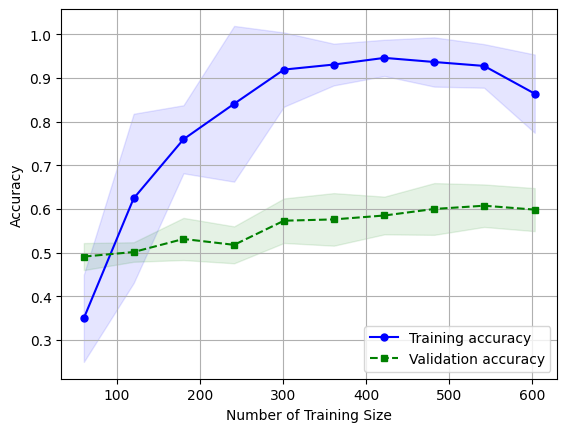

In [23]:
import matplotlib.pyplot as plt

# 繪製 Training accuracy 的學習曲線
plt.plot(
    train_sizes, 
    train_mean, 
    color='blue', 
    marker='o', 
    markersize=5, 
    label='Training accuracy'
)

# 繪製訓練分數的平均值加/減標準差的區域
plt.fill_between(
    train_sizes, 
    train_mean + train_std,
    train_mean - train_std, 
    alpha=0.1, 
    color='blue'
)

# 繪製 Validation accuracy 的學習曲線
plt.plot(
    train_sizes, 
    test_mean, 
    color='green', 
    ls='--',
    marker='s', 
    markersize=5, 
    label='Validation accuracy'
)

# 繪製驗證分數平均值加/減標準差的區域
plt.fill_between(
    train_sizes, 
    test_mean + test_std, 
    test_mean - test_std, 
    alpha=0.1, 
    color='green'
)

# 加入圖例
plt.grid()
plt.xlabel('Number of Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()